# MEDIDAS DE TENDÊNCIA CENTRAL: 
Média, Moda, Mediana e Medidas Separatrizes...

# DESAFIO 3: Fazer um estudo mais aprofundado do número de estrelas recebidas por repositório 
a partir do arquivo CSV gerado no desafio 2 usando estatística descritiva... 
Conteúdo do arquivo: Projetos de programação escritos na linguagem Python e depositados no respositório GitHub.

# Preparando o ambiente para as análises correspondentes...

In [2]:
# Instalando e chamando as bibliotecas necessárias...

# Instalando e chamando o pacote "tidyverse" para a criação declarativa de gráficos, baseado na Gramática dos Gráficos...
install.packages("tidyverse")
library(tidyverse)

# Instalando e chamando o pacote "magrittr" que oferece um conjunto de operadores que tornam o código mais legível por:
# - Estruturar sequências de operações de dados da esquerda para a direita (em oposição a de dentro e de fora),
# - Evita chamadas de funções aninhadas,
# - Minimiza a necessidade de variáveis locais e definições de funções, e
# - Torna mais fácil adicionar etapas em qualquer lugar na sequência de operações.
install.packages("magrittr")
library(magrittr)

# Instalando e chamando o pacote "fitdistrplus" que fornece funções para ajustar distribuições univariadas a diferentes 
# tipos de dados (dados censurados ou não censurados contínuos e dados discretos), entre outros...
install.packages("fitdistrplus")
library(fitdistrplus)

# Instalando e chamando o pacote "dplyr" para a melhorar a gramática de manipulação de dados, 
# o qual fornece um conjunto consistente de verbos que ajudam a resolver os desafios mais comuns nesta área...
install.packages("dplyr")
library(dplyr)

# Chamando o pacote "e1071" para o cálculo posterior de algumas medidas estatísticas descritivas de tendência central...
require(e1071)

# Eliminando notação científica nos gráficos - observação: pode ser penalizado quando publicado, por exemplo, em artigos científicos
options(scipen=999) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("magrittr"):
“installation of package ‘magrittr’ had non-zero exit status”

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS


Attaching package: ‘MASS’


The following object i

In [3]:
# Abrindo o dataframe...
df <- read.csv("../input/repospythongithub/data_repo_python.csv")
head(df)

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,⋯,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,83222441,MDEwOlJlcG9zaXRvcnk4MzIyMjQ0MQ==,system-design-primer,donnemartin/system-design-primer,False,https://github.com/donnemartin/system-design-primer,Learn how to design large-scale systems. Prep for the system design interview. Includes Anki flashcards.,False,https://api.github.com/repos/donnemartin/system-design-primer,https://api.github.com/repos/donnemartin/system-design-primer/forks,⋯,https://api.github.com/users/donnemartin/events{/privacy},https://api.github.com/users/donnemartin/received_events,User,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
2,54346799,MDEwOlJlcG9zaXRvcnk1NDM0Njc5OQ==,public-apis,public-apis/public-apis,False,https://github.com/public-apis/public-apis,A collective list of free APIs for use in software and web development.,False,https://api.github.com/repos/public-apis/public-apis,https://api.github.com/repos/public-apis/public-apis/forks,⋯,https://api.github.com/users/public-apis/events{/privacy},https://api.github.com/users/public-apis/received_events,Organization,False,,,,,,NA
3,123458551,MDEwOlJlcG9zaXRvcnkxMjM0NTg1NTE=,Python-100-Days,jackfrued/Python-100-Days,False,https://github.com/jackfrued/Python-100-Days,Python - 100天从新手到大师,False,https://api.github.com/repos/jackfrued/Python-100-Days,https://api.github.com/repos/jackfrued/Python-100-Days/forks,⋯,https://api.github.com/users/jackfrued/events{/privacy},https://api.github.com/users/jackfrued/received_events,User,False,,,,,,NA
4,63476337,MDEwOlJlcG9zaXRvcnk2MzQ3NjMzNw==,Python,TheAlgorithms/Python,False,https://github.com/TheAlgorithms/Python,All Algorithms implemented in Python,False,https://api.github.com/repos/TheAlgorithms/Python,https://api.github.com/repos/TheAlgorithms/Python/forks,⋯,https://api.github.com/users/TheAlgorithms/events{/privacy},https://api.github.com/users/TheAlgorithms/received_events,Organization,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NA
5,21289110,MDEwOlJlcG9zaXRvcnkyMTI4OTExMA==,awesome-python,vinta/awesome-python,False,https://github.com/vinta/awesome-python,"A curated list of awesome Python frameworks, libraries, software and resources",False,https://api.github.com/repos/vinta/awesome-python,https://api.github.com/repos/vinta/awesome-python/forks,⋯,https://api.github.com/users/vinta/events{/privacy},https://api.github.com/users/vinta/received_events,User,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
6,51117837,MDEwOlJlcG9zaXRvcnk1MTExNzgzNw==,models,tensorflow/models,False,https://github.com/tensorflow/models,Models and examples built with TensorFlow,False,https://api.github.com/repos/tensorflow/models,https://api.github.com/repos/tensorflow/models/forks,⋯,https://api.github.com/users/tensorflow/events{/privacy},https://api.github.com/users/tensorflow/received_events,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NA


# Análises Descritivas:

In [4]:
# Criando uma variável para o número de estrelas contabilizadas por repositório...
stars <- df$stargazers_count
stars

[1] 110380  98891  94733  90576  88198  66908  56830  53233  52614  48558
[11]  47127  45435  43804  42751  38706  38063  36887  36796  36069  35845
[21]  34399  34232  32972  32826  30585  30423  29210  28943  28782  28554

In [5]:
# Criando uma variável para os IDs dos repositórios...
ids <- df$id
ids

[1]  83222441  54346799 123458551  63476337  21289110  51117837  33614304
 [8]   4164482    596892   3544424  21872392   3638964   1362490    843222
[15]    529502  40416236  83844720  12888993   5483330 155220641  58028038
[22]  81598961 114747226   4086616  39464018  29290473 191113739  41058054
[29]  91573538  70905478

In [6]:
# Observando o valor mínimo e máximo de estrelas recebidas...
range (stars)

[1]  28554 110380

In [7]:
# Calculando a média aritmética simples de estrelas recebidas por todos os repositórios...
mean(stars)

[1] 49111

In [8]:
# Calculando a mediana de estrelas recebidas por todos os repositórios...
# Mediana: valor que identifica o ID que ocupa a posição central de estrelas recebidas por projeto
median(stars)

[1] 38384.5

In [9]:
# Mostrando um resumo dos valores da estatística descritiva das estrelas recebidas por projeto...
summary(stars)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  28554   33287   38384   49111   53078  110380 

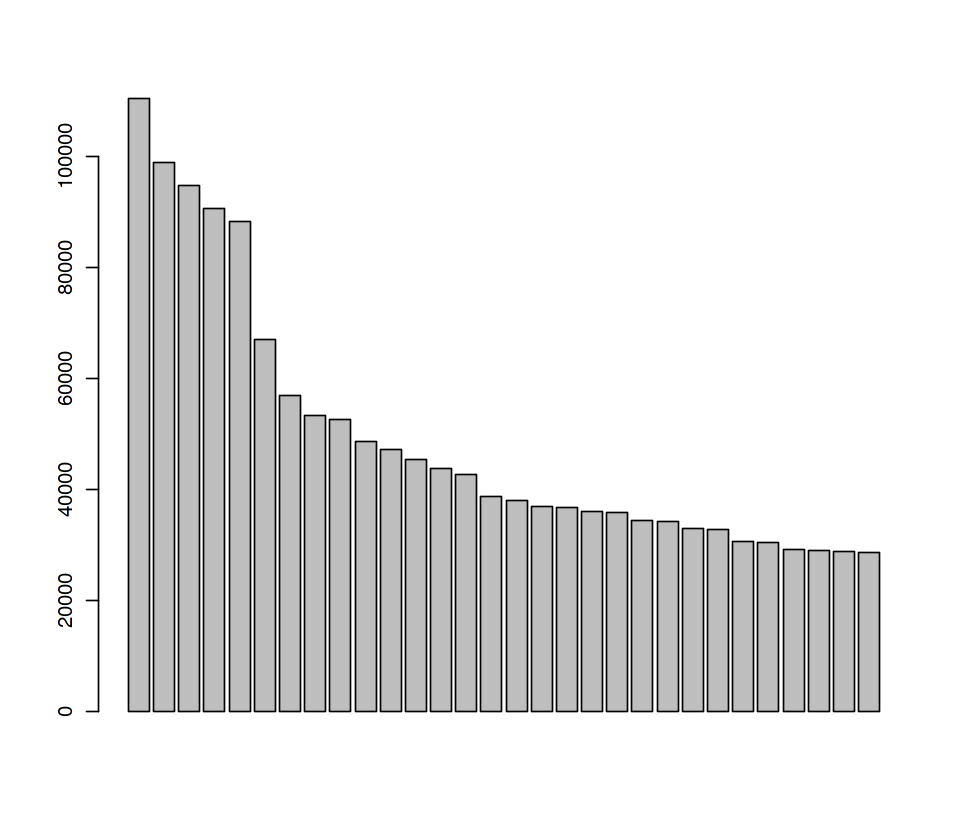

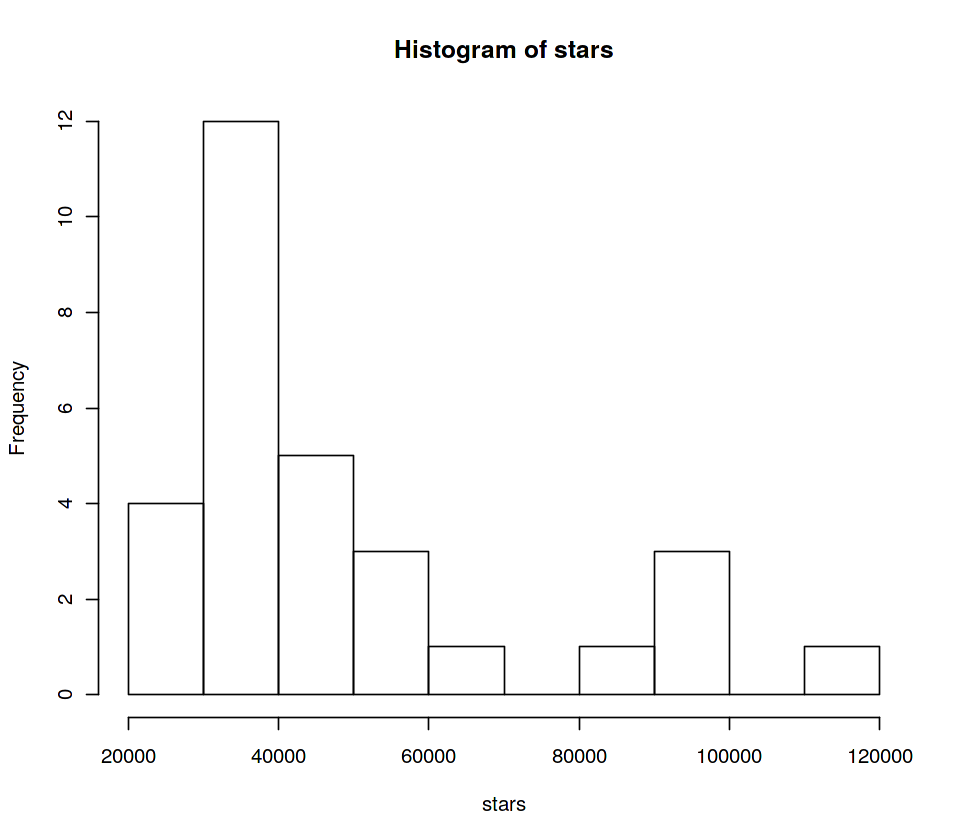

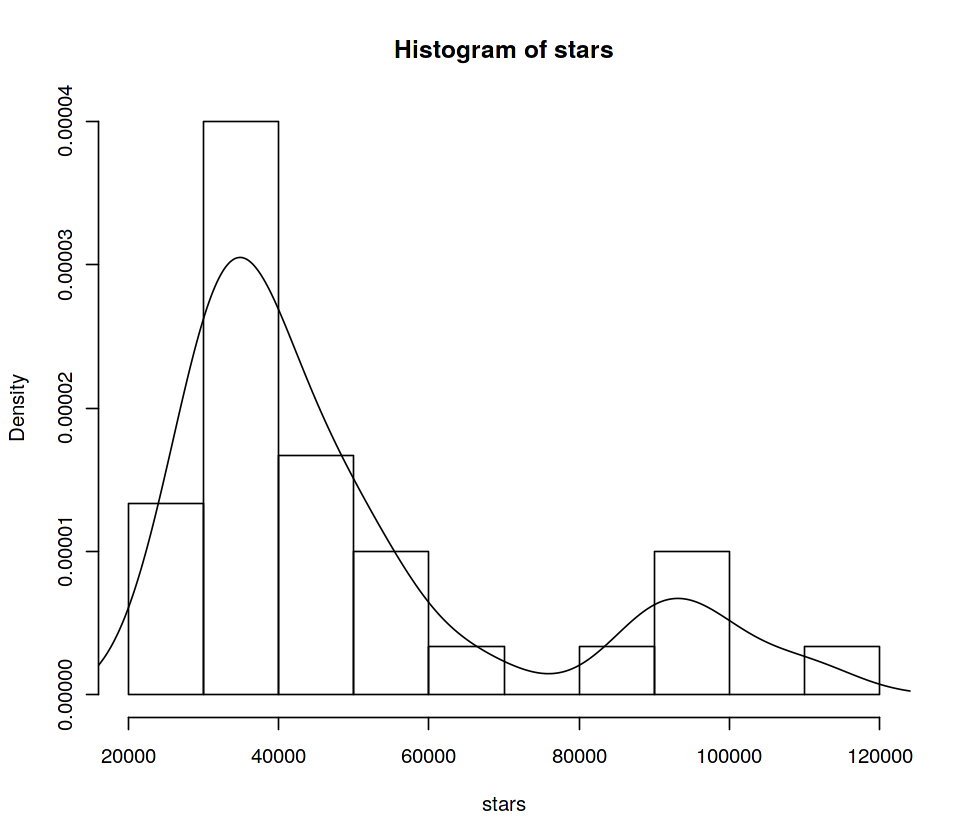

In [10]:
# Plotando algumas visualizações prévias do tipo de distribuição que o conjunto de dados em estudo apresenta...
barplot(stars)
hist(stars)
hist(stars, probability = T)
lines(density(stars))

# Análise dos resultados dos plots anteriores:

Provavelmente o conjunto de dados analisado aprensete uma Distribuição positiva ou à direita e seja do tipo geométrica. Para ter mais segurança, serão feitas mais análises ao decorrer deste notebook...

In [11]:
# Mostrando o tipo de distribuição em relação à simetria que apresenta o conjunto de dados em estudo...
# AS = 0 -> Distribuição simétrica = ausência de assimetria
# AS < 0 -> Distribuição assimétrica à esquerda ou negativa
# AS > 0 -> Distribuição assimétrica à direita ou positiva.
skewness(stars)

[1] 1.292936

# Análise do resultado do tipo de Distribuição que apresenta o conjunto de dados em estudo: 

Trata-se de uma distribuição assimétrica à direita ou positiva por o "skewness" apresentar um valor positivo

In [12]:
# Mostrando o formato de curva dado pelo coeficiente de curtose que o conjunto de dados em estudo apresenta...
# Pelo R, temos que se...
# k > 0, Leptocúrtica
# k = 0, Mesocúrtica
# k < 0, Platicúrtica
kurtosis(stars)

[1] 0.3268319

# Análise do resultado do Tipo de Curva que o conjunto de dados em estudo apresenta: 

Trata-se de uma curva do tipo leptocúrtica (alongada ou pontiguada) devido a que o valor de "kurtosis" foi positivo

summary statistics
------
min:  28554   max:  110380 
median:  38384.5 
mean:  49111 
estimated sd:  23653.01 
estimated skewness:  1.433057 
estimated kurtosis:  3.896351 

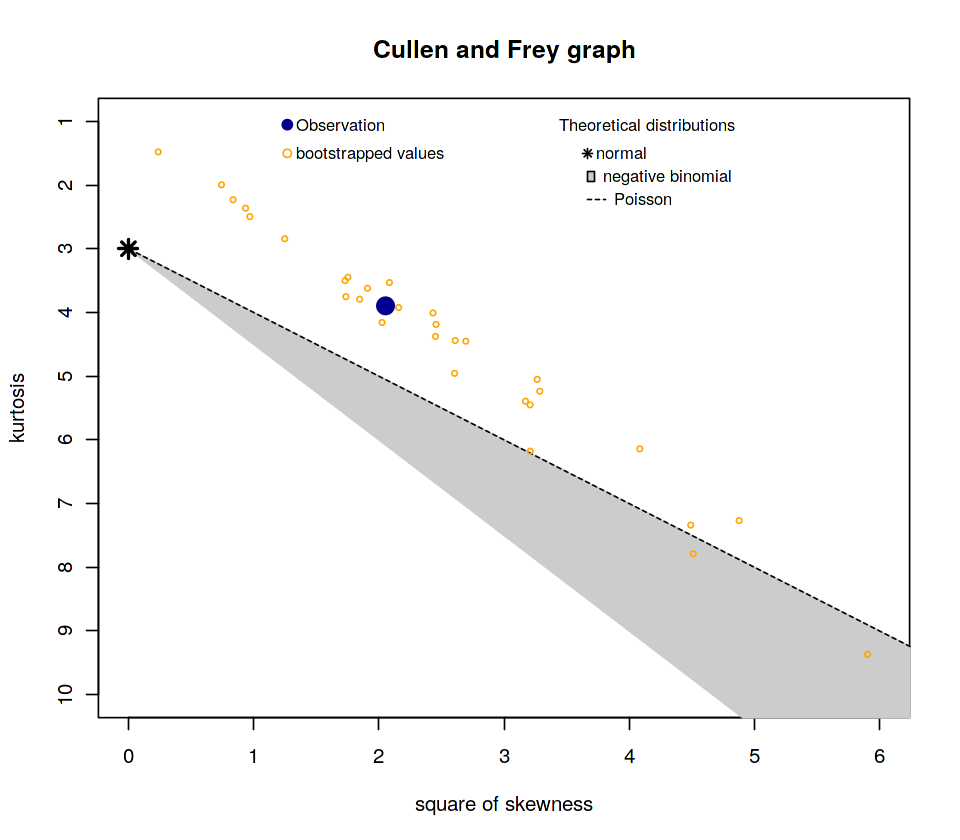

In [13]:
# Prevendo o tipo de distribuição obtido pela análise dos dados em estudo pelo método de Cullen and Frey...
# Nota: Os dados analisados (stargazers_count = contagem total de estrelas atribuídas por projeto) 
# foram classificados como discretos...
descdist(df$stargazers_count, discrete = TRUE, boot=30)

# Análise da previsão do tipo de Distribuição de Probabilidade através do método de "Cullen and Frey" para o conjunto de dados em estudo: 

Observa-se que não foi possível prever uma Distribuição de Probabilidade pelo método utilizado.

# Observação 1: 
A. Se os dados são discretos, então o método de Cullen and Frey preve uma distribuição do tipo:
* Poisson,
* Binomial Negativo ou
* Normal. 

B. Se os dados não forem discretos, então as possíveis distribuições que o método de Cullen and Frey consegue predizer são:
* Uniforme,
* Normal, 
* Logística, 
* Lognormal, 
* Beta ou 
* Gamma.

# Observação 2:

Devido a que o método de Cullen and Frey não conseguiu predizer o tipo de distribuição dos dados analisados, então procedi a usar o seguinte protocolo...
1. O conjunto de dados analisado é discreto (soma de todas as estrelas dadas a cada projeto depositado no GitHub).
2. Não é possível estimar resultados nem probabilidades a partir do conjunto de dados analisado. 
3. O conjunto dados é assimétrico (valor de Skewness = 1.292936 -> # AS > 0 -> Distribuição assimétrica à direita ou positiva).
4. Os outliers são todos positivos (ver gráfico do bloxplot a continuação).
5. Então, a distribuição é do tipo GEOMÉTRICA (ver gráfico do barplot a continuação).

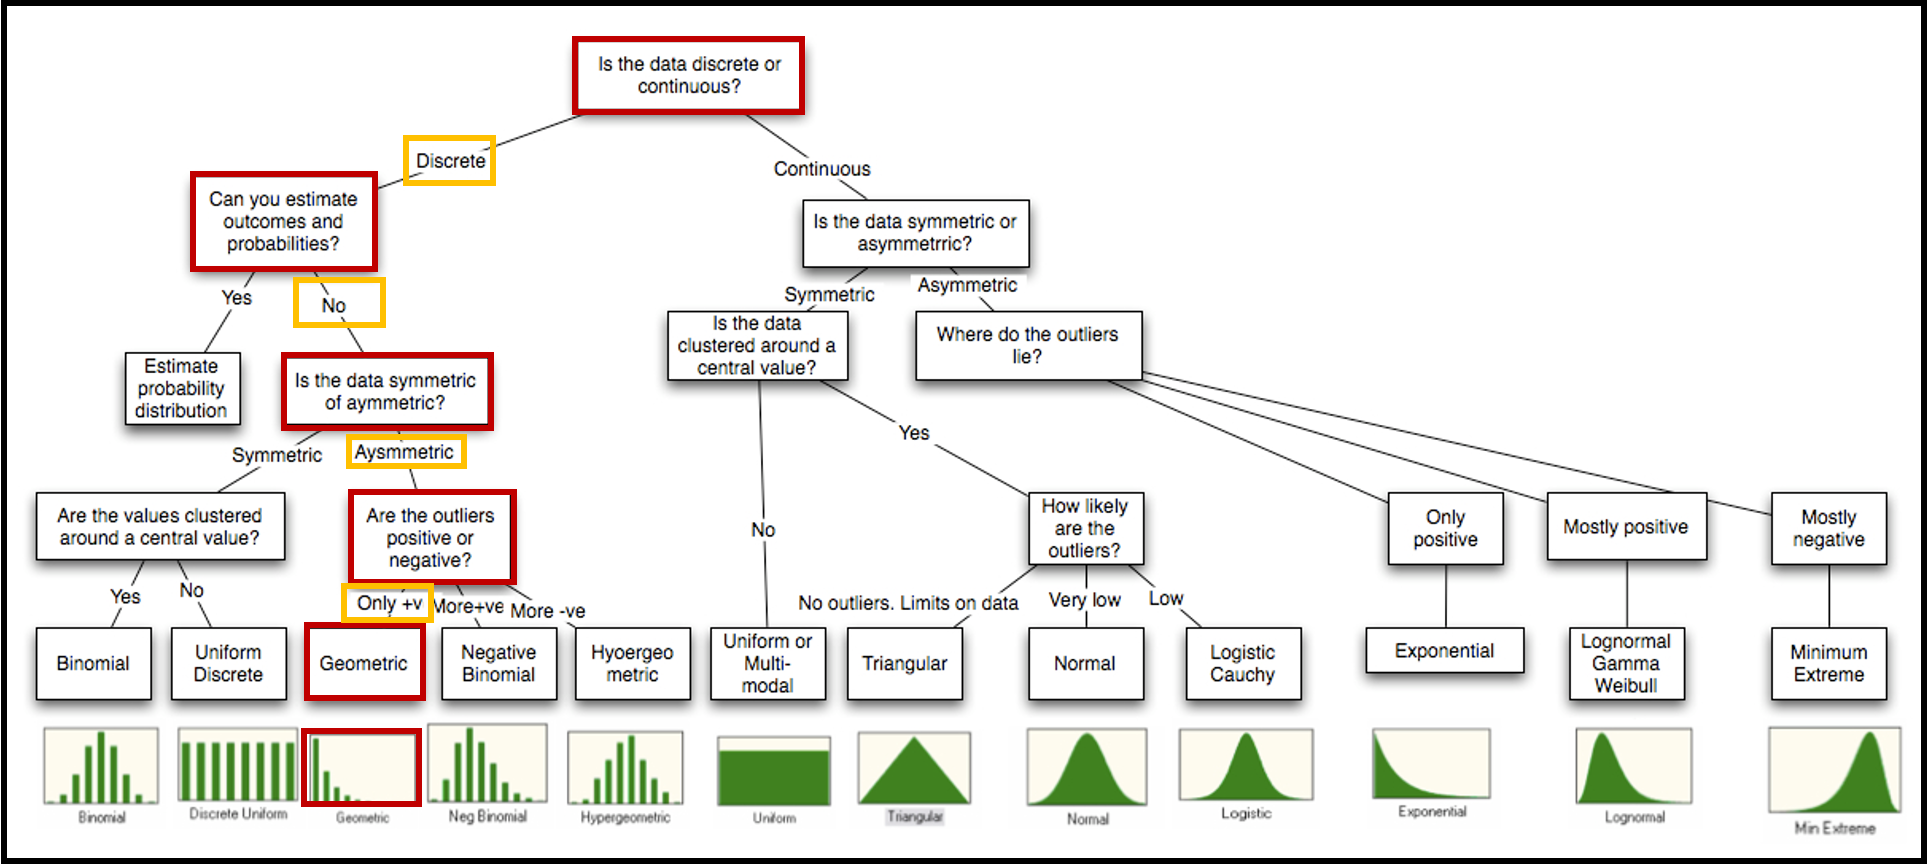

# Criando os gráficos de Boxplot e Barplot...

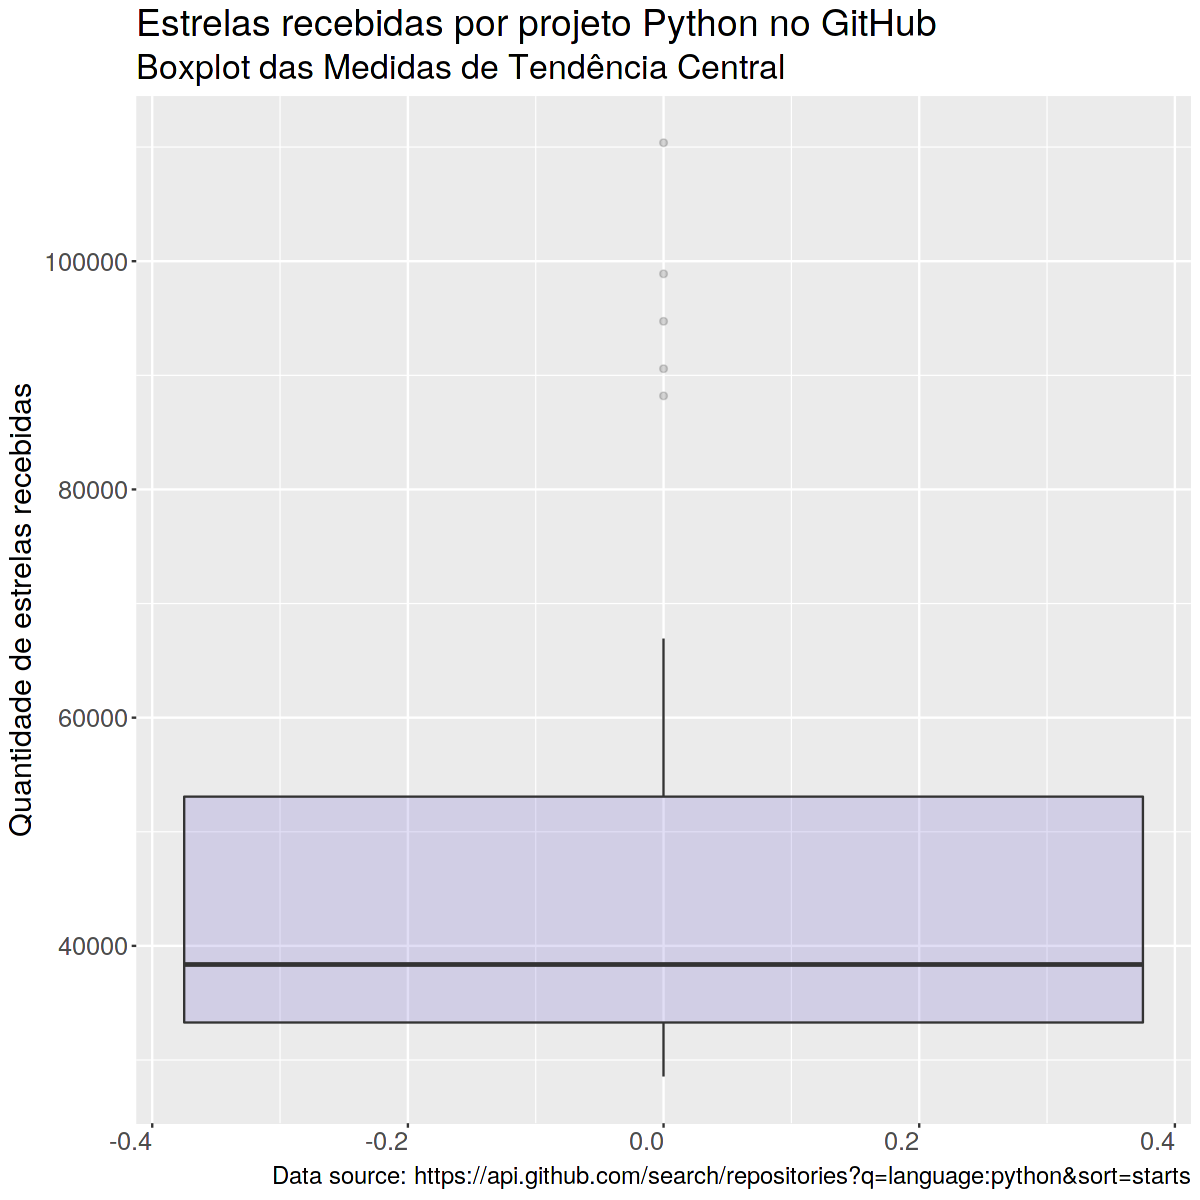

In [44]:
# Formatando o tamanho do gráfico...
options(repr.plot.width = 10, repr.plot.height = 10)

# Formatando outros parâmetros do gráfico...
boxplot <- ggplot(df, aes(y = stargazers_count)) + 
        geom_boxplot(fill ="slateblue", alpha = 0.2) +
        theme(plot.title = element_text(size = 22),
              plot.subtitle = element_text(size = 20),
              axis.title.y = element_text(size = 18), 
              axis.text.x = element_text(hjust = 1, size = 15),
              axis.text.y = element_text(hjust = 1, size = 15),
              plot.caption = element_text(size = 14)) +
        labs(title = "Estrelas recebidas por projeto Python no GitHub",
             subtitle = "Boxplot das Medidas de Tendência Central",
             caption = "Data source: https://api.github.com/search/repositories?q=language:python&sort=starts",
             y = "Quantidade de estrelas recebidas")
boxplot

# Análise do resultado do Boxplot:

**Pelo gráfico anterior, observa-se que:**
- O valor mínimo (sem contar com os outliers) encontra-se em torno de 30K e o máximo em torno dos 68k aproximadamente;
- O Quartil 1 (Q1) que representa a concentração do 25% dos dados encontra-se em torno de 23k aproximadamente; enquanto que o Q2 (a média ou o 50% dos valores) encontra-se em torno de 39k. Finalmente, o Q3 (o 75% dos valores) encontra-se em torno de 52k aproximadamente.
- Os outliers são todos positivos e o mais alto mostra que o valor máximo encontra-se em torno dos 110k

**Quando os resultados do Boxplot são comparados com os valores específicos mostrados nos comandos anteriores, observa-se semelhança entre eles** (comparar valores no gráfico com os valores a seguir --> resultado já mostrado anteriormente):

Min.   1st Qu.  Median   Mean  3rd Qu.    Max. 
28554   33287   38384   49111   53078  110380 



# Anatomia geral do Boxplot:

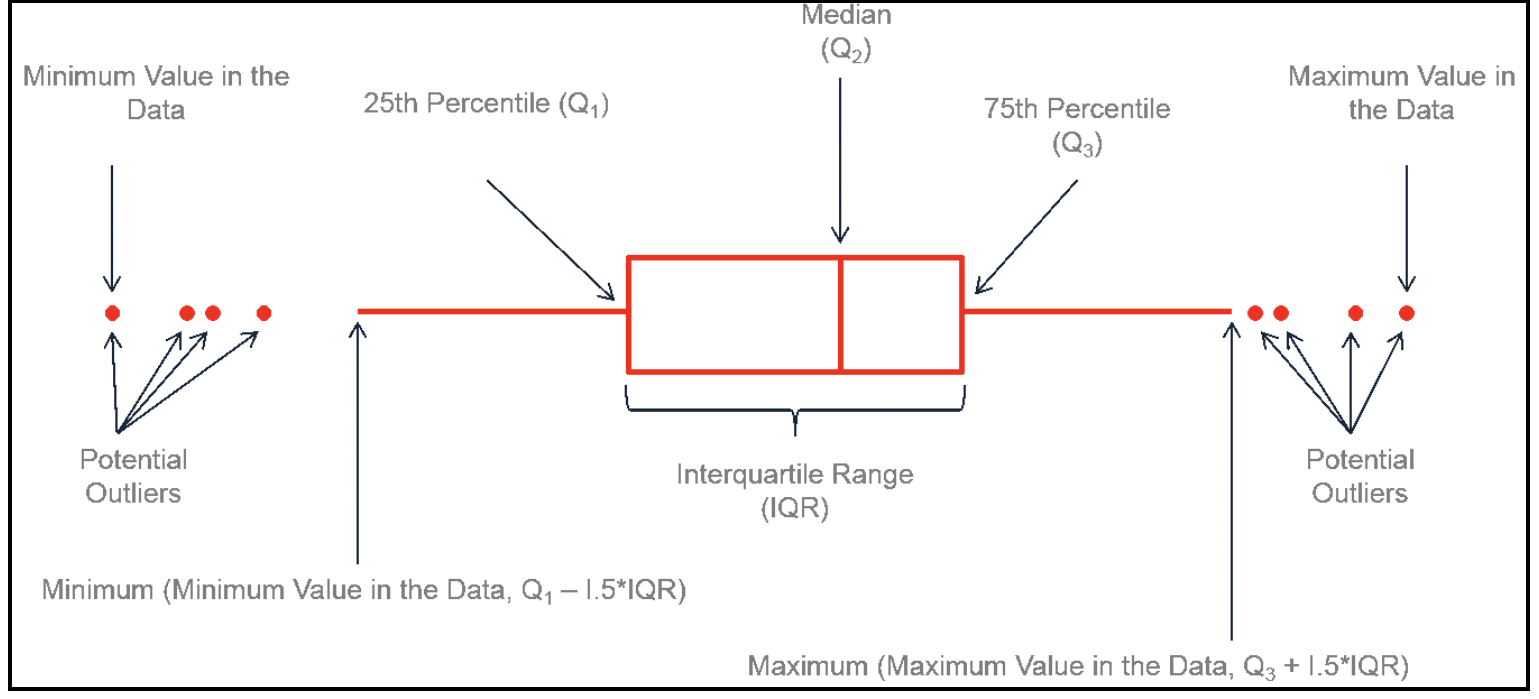

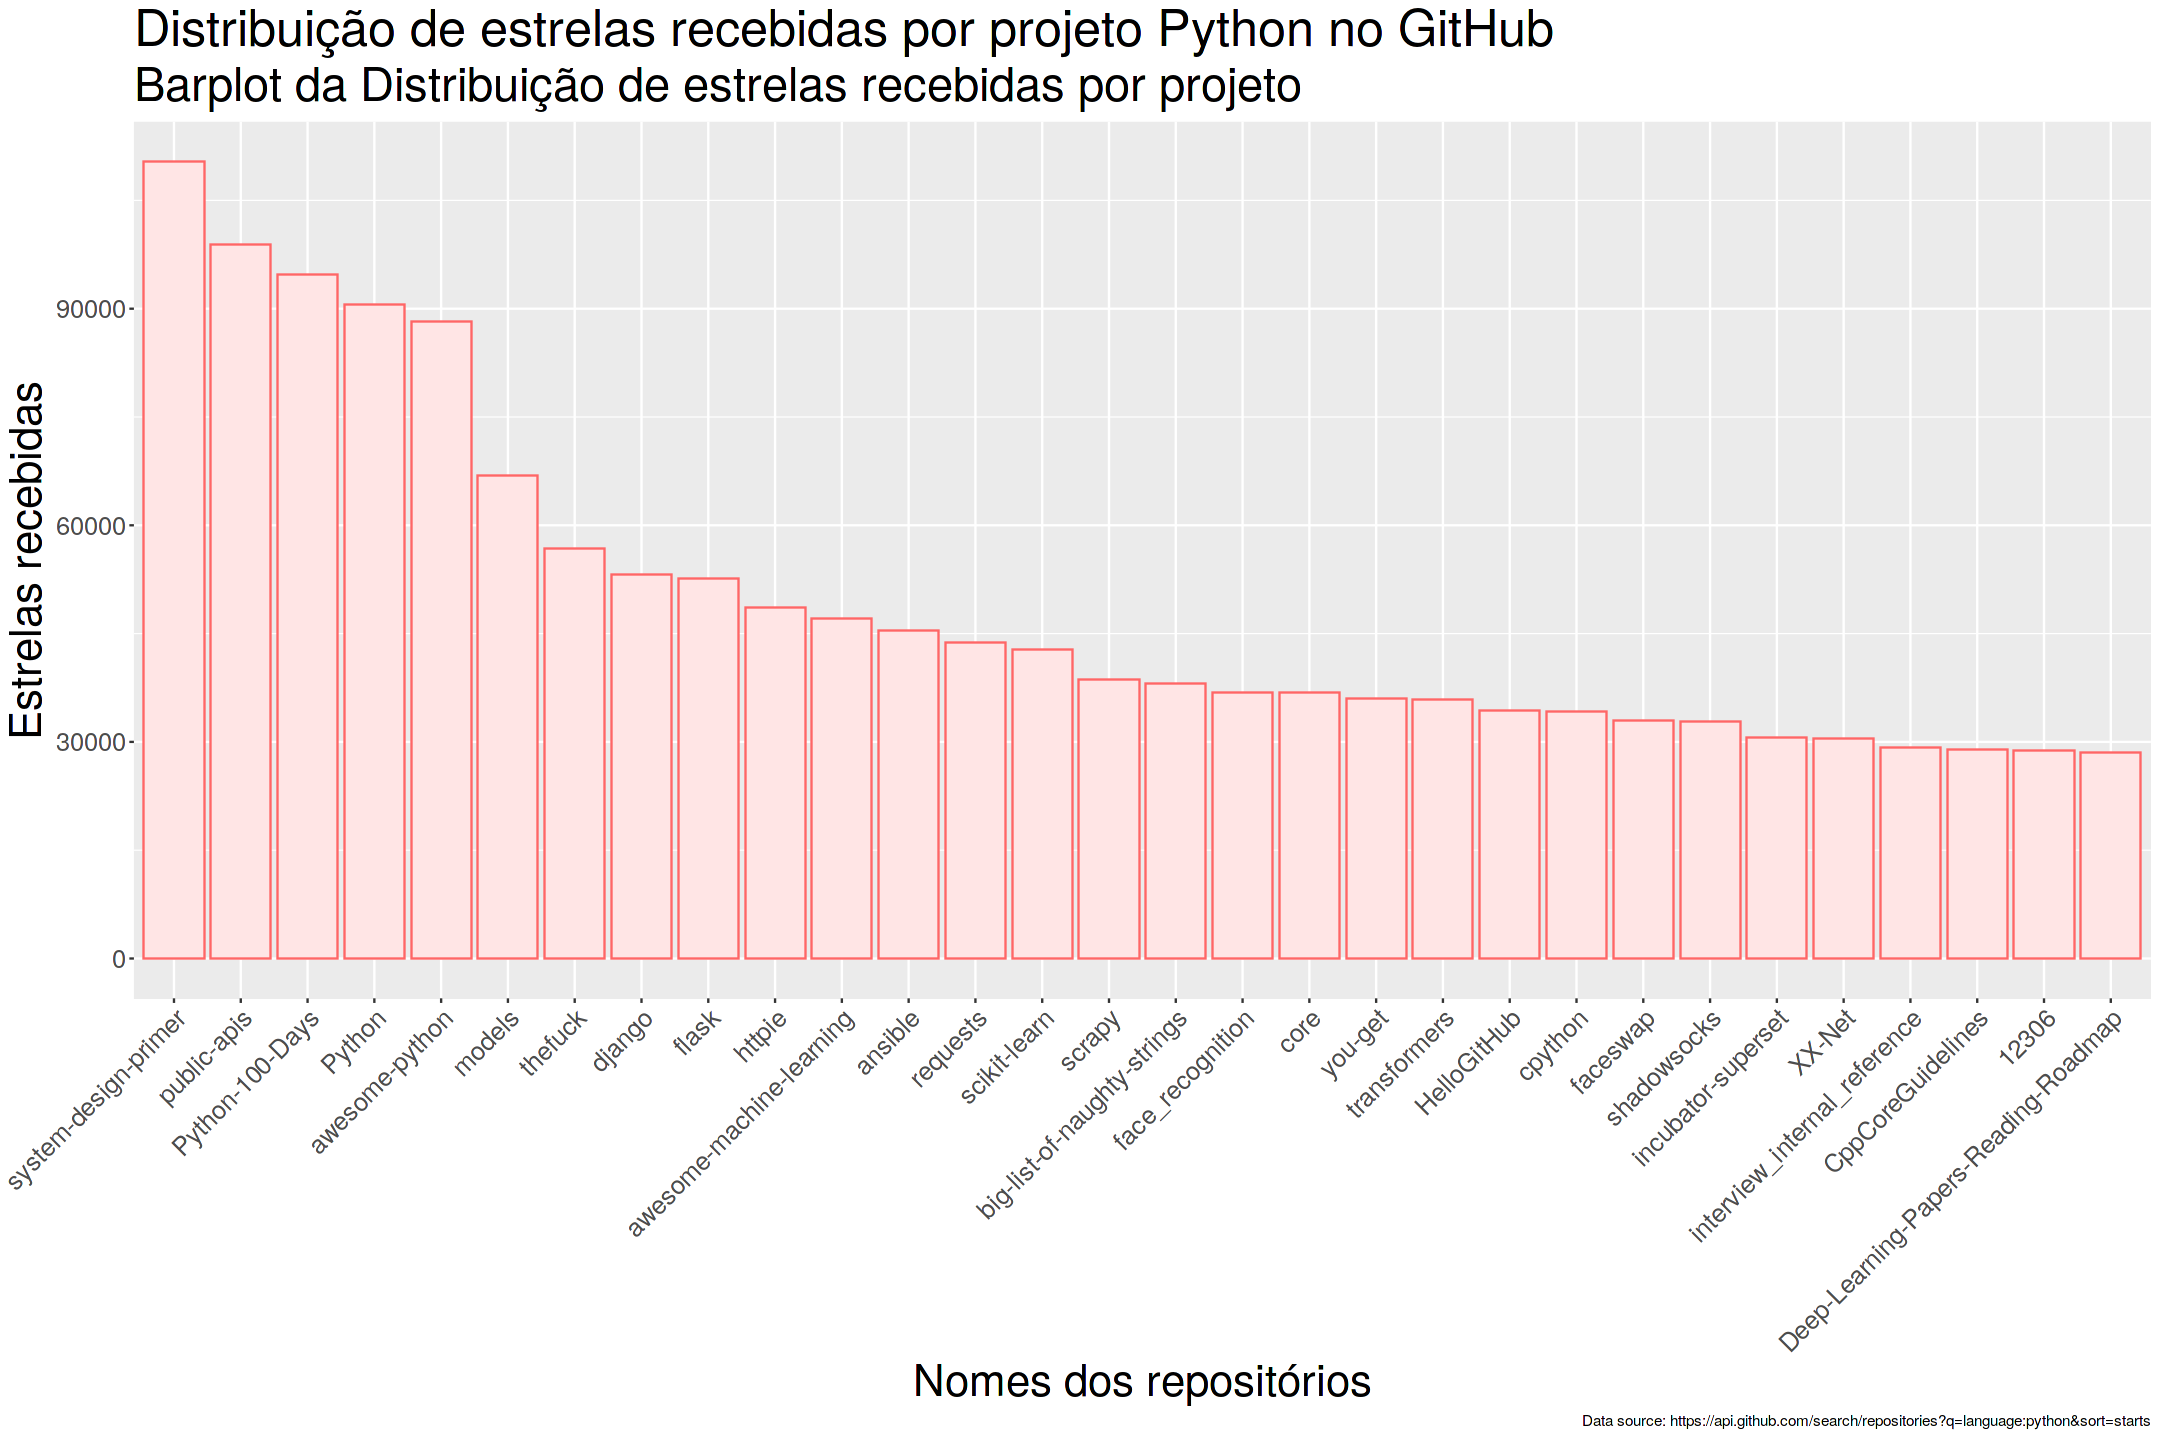

In [41]:
# Formatando o tamanho do gráfico...
options(repr.plot.width = 18, repr.plot.height = 12)

# Plotando o barplot do conjunto de dados em estudo...
barplot <- ggplot(df, aes(x = reorder(name, -stargazers_count), y = stargazers_count)) + 
        geom_bar(stat="identity", color = "#FF6666", fill = "#FFE5E5") + 
        theme(plot.title = element_text(size = 30),
              plot.subtitle = element_text(size = 28),
              axis.title.x = element_text(size = 26),
              axis.title.y = element_text(size = 26),
              axis.text.x = element_text(angle = 45, hjust = 1, size = 15),
              axis.text.y = element_text(hjust = 1, size = 15),
              plot.caption = element_text(size = 14)) +
        labs(title = "Distribuição de estrelas recebidas por projeto Python no GitHub",
             subtitle = "Barplot da Distribuição de estrelas recebidas por projeto",
             caption = "Data source: https://api.github.com/search/repositories?q=language:python&sort=starts",
             x = "Nomes dos repositórios", y = "Estrelas recebidas")
barplot

# Análise do Barplot:

Pelo gráfico gerado anteriormente, temos que:

- A distribuição observada segue uma curva do tipo geomêtrica,o qual implica uma representação do número de falhas antes de se obter sucesso em uma série de tentativas de Bernoulli. Esta distribuição de probabilidade discreta é representada pela função de densidade de probabilidade: f(x) = (1 − p)x − 1p
(https://en.wikipedia.org/wiki/Geometric_distribution)

- O repositório escrito em Python e depositado no GitHub com maior número de estrelas (com 110380 estrelas e 110380 visualizações) é o denominado "system_design_primer"...
ID do projeto: 83222441
Owner Login: donnemartin
Owner ID: 5458997
Owner URL: https://api.github.com/users/donnemartin
Criado em: 13/10/2020
Link: https://github.com/donnemartin/system-design-primer
API: https://api.github.com/repos/donnemartin/system-design-primer
Descrição do projeto: Aprenda a projetar sistemas em grande escala. Prepare-se para a entrevista de design do sistema. Inclui flashcards Anki.

# Criando listas...

In [17]:
# Listando os nomes dos 20 primeiros repositórios com o número total de estrelas mais altos...
listA <- df[,c("name", "stargazers_count")]
head(listA,20)

,name,stargazers_count
,<fct>,<int>
1,system-design-primer,110380
2,public-apis,98891
3,Python-100-Days,94733
4,Python,90576
5,awesome-python,88198
6,models,66908
7,thefuck,56830
8,django,53233
9,flask,52614


# Listando os nomes dos 20 repositórios que ficaram mais próximos do valor médio de estrelas...

In [18]:
# 1. Lembrando o valor médio...
mean(stars)

[1] 49111

In [19]:
# 2. Criando a primeira lista: os 10 repositórios mais próximos do valor médio (de forma cresciente)...
listB_a <- df %>% filter (stargazers_count >= mean(stargazers_count)) %>% group_by(name)
leftB <- tail(listB_a, 10)
leftB

id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,⋯,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
83222441,MDEwOlJlcG9zaXRvcnk4MzIyMjQ0MQ==,system-design-primer,donnemartin/system-design-primer,False,https://github.com/donnemartin/system-design-primer,Learn how to design large-scale systems. Prep for the system design interview. Includes Anki flashcards.,False,https://api.github.com/repos/donnemartin/system-design-primer,https://api.github.com/repos/donnemartin/system-design-primer/forks,⋯,https://api.github.com/users/donnemartin/events{/privacy},https://api.github.com/users/donnemartin/received_events,User,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
54346799,MDEwOlJlcG9zaXRvcnk1NDM0Njc5OQ==,public-apis,public-apis/public-apis,False,https://github.com/public-apis/public-apis,A collective list of free APIs for use in software and web development.,False,https://api.github.com/repos/public-apis/public-apis,https://api.github.com/repos/public-apis/public-apis/forks,⋯,https://api.github.com/users/public-apis/events{/privacy},https://api.github.com/users/public-apis/received_events,Organization,False,,,,,,NA
123458551,MDEwOlJlcG9zaXRvcnkxMjM0NTg1NTE=,Python-100-Days,jackfrued/Python-100-Days,False,https://github.com/jackfrued/Python-100-Days,Python - 100天从新手到大师,False,https://api.github.com/repos/jackfrued/Python-100-Days,https://api.github.com/repos/jackfrued/Python-100-Days/forks,⋯,https://api.github.com/users/jackfrued/events{/privacy},https://api.github.com/users/jackfrued/received_events,User,False,,,,,,NA
63476337,MDEwOlJlcG9zaXRvcnk2MzQ3NjMzNw==,Python,TheAlgorithms/Python,False,https://github.com/TheAlgorithms/Python,All Algorithms implemented in Python,False,https://api.github.com/repos/TheAlgorithms/Python,https://api.github.com/repos/TheAlgorithms/Python/forks,⋯,https://api.github.com/users/TheAlgorithms/events{/privacy},https://api.github.com/users/TheAlgorithms/received_events,Organization,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NA
21289110,MDEwOlJlcG9zaXRvcnkyMTI4OTExMA==,awesome-python,vinta/awesome-python,False,https://github.com/vinta/awesome-python,"A curated list of awesome Python frameworks, libraries, software and resources",False,https://api.github.com/repos/vinta/awesome-python,https://api.github.com/repos/vinta/awesome-python/forks,⋯,https://api.github.com/users/vinta/events{/privacy},https://api.github.com/users/vinta/received_events,User,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
51117837,MDEwOlJlcG9zaXRvcnk1MTExNzgzNw==,models,tensorflow/models,False,https://github.com/tensorflow/models,Models and examples built with TensorFlow,False,https://api.github.com/repos/tensorflow/models,https://api.github.com/repos/tensorflow/models/forks,⋯,https://api.github.com/users/tensorflow/events{/privacy},https://api.github.com/users/tensorflow/received_events,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NA
33614304,MDEwOlJlcG9zaXRvcnkzMzYxNDMwNA==,thefuck,nvbn/thefuck,False,https://github.com/nvbn/thefuck,Magnificent app which corrects your previous console command.,False,https://api.github.com/repos/nvbn/thefuck,https://api.github.com/repos/nvbn/thefuck/forks,⋯,https://api.github.com/users/nvbn/events{/privacy},https://api.github.com/users/nvbn/received_events,User,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NA
4164482,MDEwOlJlcG9zaXRvcnk0MTY0NDgy,django,django/django,False,https://github.com/django/django,The Web framework for perfectionists with deadlines.,False,https://api.github.com/repos/django/django,https://api.github.com/repos/django/django/forks,⋯,https://api.github.com/users/django/events{/privacy},https://

In [20]:
# 3. Criando a segunda lista: os 10 repositórios mais próximos do valor médio (de forma decresciente)...
listB_b <- df %>% filter (stargazers_count <= mean(stargazers_count)) %>% group_by(name)
rightB <- head(listB_b, 10)
rightB

id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,⋯,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
3544424,MDEwOlJlcG9zaXRvcnkzNTQ0NDI0,httpie,httpie/httpie,False,https://github.com/httpie/httpie,"As easy as /aitch-tee-tee-pie/ 🥧 Modern, user-friendly command-line HTTP client for the API era. JSON support, colors, sessions, downloads, plugins & more. https://twitter.com/httpie",False,https://api.github.com/repos/httpie/httpie,https://api.github.com/repos/httpie/httpie/forks,⋯,https://api.github.com/users/httpie/events{/privacy},https://api.github.com/users/httpie/received_events,Organization,False,bsd-3-clause,"BSD 3-Clause ""New"" or ""Revised"" License",BSD-3-Clause,https://api.github.com/licenses/bsd-3-clause,MDc6TGljZW5zZTU=,NA
21872392,MDEwOlJlcG9zaXRvcnkyMTg3MjM5Mg==,awesome-machine-learning,josephmisiti/awesome-machine-learning,False,https://github.com/josephmisiti/awesome-machine-learning,"A curated list of awesome Machine Learning frameworks, libraries and software.",False,https://api.github.com/repos/josephmisiti/awesome-machine-learning,https://api.github.com/repos/josephmisiti/awesome-machine-learning/forks,⋯,https://api.github.com/users/josephmisiti/events{/privacy},https://api.github.com/users/josephmisiti/received_events,User,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
3638964,MDEwOlJlcG9zaXRvcnkzNjM4OTY0,ansible,ansible/ansible,False,https://github.com/ansible/ansible,"Ansible is a radically simple IT automation platform that makes your applications and systems easier to deploy and maintain. Automate everything from code deployment to network configuration to cloud management, in a language that approaches plain English, using SSH, with no agents to install on remote systems. https://docs.ansible.com.",False,https://api.github.com/repos/ansible/ansible,https://api.github.com/repos/ansible/ansible/forks,⋯,https://api.github.com/users/ansible/events{/privacy},https://api.github.com/users/ansible/received_events,Organization,False,gpl-3.0,GNU General Public License v3.0,GPL-3.0,https://api.github.com/licenses/gpl-3.0,MDc6TGljZW5zZTk=,NA
1362490,MDEwOlJlcG9zaXRvcnkxMzYyNDkw,requests,psf/requests,False,https://github.com/psf/requests,"A simple, yet elegant HTTP library.",False,https://api.github.com/repos/psf/requests,https://api.github.com/repos/psf/requests/forks,⋯,https://api.github.com/users/psf/events{/privacy},https://api.github.com/users/psf/received_events,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NA
843222,MDEwOlJlcG9zaXRvcnk4NDMyMjI=,scikit-learn,scikit-learn/scikit-learn,False,https://github.com/scikit-learn/scikit-learn,scikit-learn: machine learning in Python,False,https://api.github.com/repos/scikit-learn/scikit-learn,https://api.github.com/repos/scikit-learn/scikit-learn/forks,⋯,https://api.github.com/users/scikit-learn/events{/privacy},https://api.github.com/users/scikit-learn/received_events,Organization,False,bsd-3-clause,"BSD 3-Clause ""New"" or ""Revised"" License",BSD-3-Clause,https://api.github.com/licenses/bsd-3-clause,MDc6TGljZW5zZTU=,NA
529502,MDEwOlJlcG9zaXRvcnk1Mjk1MDI=,scrapy,scrapy/scrapy,False,https://github.com/scrapy/scrapy,"Scrapy, a fast high-level web crawling & scraping framework for Python.",False,https://api.github.com/repos/scrapy/scrapy,https://api.github.com/repos/scrapy/scrapy/forks,⋯,https://api.github.com/users/scrapy/events{/privacy},https://api.github.com/users/scrapy/received_events,Organization,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
40416236,MDEwOlJlcG9zaXRvcnk0MDQxNjIzNg==,big-list-of-naughty-strings,minimaxir/big-list-of-naughty-strings,False,https://github.com/minimaxir/big-list-of-naughty-strings,The Big List of Naughty Strings

In [21]:
# 4. Juntando as duas listas anteriores para criar uma única lista contendo os 20 repositórios mais próximos do valor médio...
allB <- merge(leftB, rightB, all = TRUE)
allB[order(-allB$stargazers_count),]

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,⋯,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
17,83222441,MDEwOlJlcG9zaXRvcnk4MzIyMjQ0MQ==,system-design-primer,donnemartin/system-design-primer,False,https://github.com/donnemartin/system-design-primer,Learn how to design large-scale systems. Prep for the system design interview. Includes Anki flashcards.,False,https://api.github.com/repos/donnemartin/system-design-primer,https://api.github.com/repos/donnemartin/system-design-primer/forks,⋯,https://api.github.com/users/donnemartin/events{/privacy},https://api.github.com/users/donnemartin/received_events,User,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
15,54346799,MDEwOlJlcG9zaXRvcnk1NDM0Njc5OQ==,public-apis,public-apis/public-apis,False,https://github.com/public-apis/public-apis,A collective list of free APIs for use in software and web development.,False,https://api.github.com/repos/public-apis/public-apis,https://api.github.com/repos/public-apis/public-apis/forks,⋯,https://api.github.com/users/public-apis/events{/privacy},https://api.github.com/users/public-apis/received_events,Organization,False,,,,,,NA
19,123458551,MDEwOlJlcG9zaXRvcnkxMjM0NTg1NTE=,Python-100-Days,jackfrued/Python-100-Days,False,https://github.com/jackfrued/Python-100-Days,Python - 100天从新手到大师,False,https://api.github.com/repos/jackfrued/Python-100-Days,https://api.github.com/repos/jackfrued/Python-100-Days/forks,⋯,https://api.github.com/users/jackfrued/events{/privacy},https://api.github.com/users/jackfrued/received_events,User,False,,,,,,NA
16,63476337,MDEwOlJlcG9zaXRvcnk2MzQ3NjMzNw==,Python,TheAlgorithms/Python,False,https://github.com/TheAlgorithms/Python,All Algorithms implemented in Python,False,https://api.github.com/repos/TheAlgorithms/Python,https://api.github.com/repos/TheAlgorithms/Python/forks,⋯,https://api.github.com/users/TheAlgorithms/events{/privacy},https://api.github.com/users/TheAlgorithms/received_events,Organization,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NA
10,21289110,MDEwOlJlcG9zaXRvcnkyMTI4OTExMA==,awesome-python,vinta/awesome-python,False,https://github.com/vinta/awesome-python,"A curated list of awesome Python frameworks, libraries, software and resources",False,https://api.github.com/repos/vinta/awesome-python,https://api.github.com/repos/vinta/awesome-python/forks,⋯,https://api.github.com/users/vinta/events{/privacy},https://api.github.com/users/vinta/received_events,User,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
14,51117837,MDEwOlJlcG9zaXRvcnk1MTExNzgzNw==,models,tensorflow/models,False,https://github.com/tensorflow/models,Models and examples built with TensorFlow,False,https://api.github.com/repos/tensorflow/models,https://api.github.com/repos/tensorflow/models/forks,⋯,https://api.github.com/users/tensorflow/events{/privacy},https://api.github.com/users/tensorflow/received_events,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NA
12,33614304,MDEwOlJlcG9zaXRvcnkzMzYxNDMwNA==,thefuck,nvbn/thefuck,False,https://github.com/nvbn/thefuck,Magnificent app which corrects your previous console command.,False,https://api.github.com/repos/nvbn/thefuck,https://api.github.com/repos/nvbn/thefuck/forks,⋯,https://api.github.com/users/nvbn/events{/privacy},https://api.github.com/users/nvbn/received_events,User,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NA
7,4164482,MDEwOlJlcG9zaXRvcnk0MTY0NDgy,django,django/django,False,https://github.com/django/django,The Web framework for perfectionists with deadlines.,False,https://api.github.com/repos/django/django,https://api.github.com/repos/django/django/forks,⋯,https://api.github.com/users/django/

# Listando os nomes dos 20 repositórios que ficaram mais próximos do valor da mediana de estrelas...

In [22]:
# 1. Lembrando o valor médio...
median(stars)

[1] 38384.5

In [23]:
# 2. Criando a primeira lista: os 10 repositórios mais próximos do valor médio (de forma cresciente)...
listC_a <- df %>% dplyr::filter (stargazers_count >= median(stargazers_count)) %>% dplyr::group_by(name)
leftC <- tail(listC_a,10)
leftC

id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,⋯,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
51117837,MDEwOlJlcG9zaXRvcnk1MTExNzgzNw==,models,tensorflow/models,False,https://github.com/tensorflow/models,Models and examples built with TensorFlow,False,https://api.github.com/repos/tensorflow/models,https://api.github.com/repos/tensorflow/models/forks,⋯,https://api.github.com/users/tensorflow/events{/privacy},https://api.github.com/users/tensorflow/received_events,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NA
33614304,MDEwOlJlcG9zaXRvcnkzMzYxNDMwNA==,thefuck,nvbn/thefuck,False,https://github.com/nvbn/thefuck,Magnificent app which corrects your previous console command.,False,https://api.github.com/repos/nvbn/thefuck,https://api.github.com/repos/nvbn/thefuck/forks,⋯,https://api.github.com/users/nvbn/events{/privacy},https://api.github.com/users/nvbn/received_events,User,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NA
4164482,MDEwOlJlcG9zaXRvcnk0MTY0NDgy,django,django/django,False,https://github.com/django/django,The Web framework for perfectionists with deadlines.,False,https://api.github.com/repos/django/django,https://api.github.com/repos/django/django/forks,⋯,https://api.github.com/users/django/events{/privacy},https://api.github.com/users/django/received_events,Organization,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
596892,MDEwOlJlcG9zaXRvcnk1OTY4OTI=,flask,pallets/flask,False,https://github.com/pallets/flask,The Python micro framework for building web applications.,False,https://api.github.com/repos/pallets/flask,https://api.github.com/repos/pallets/flask/forks,⋯,https://api.github.com/users/pallets/events{/privacy},https://api.github.com/users/pallets/received_events,Organization,False,bsd-3-clause,"BSD 3-Clause ""New"" or ""Revised"" License",BSD-3-Clause,https://api.github.com/licenses/bsd-3-clause,MDc6TGljZW5zZTU=,NA
3544424,MDEwOlJlcG9zaXRvcnkzNTQ0NDI0,httpie,httpie/httpie,False,https://github.com/httpie/httpie,"As easy as /aitch-tee-tee-pie/ 🥧 Modern, user-friendly command-line HTTP client for the API era. JSON support, colors, sessions, downloads, plugins & more. https://twitter.com/httpie",False,https://api.github.com/repos/httpie/httpie,https://api.github.com/repos/httpie/httpie/forks,⋯,https://api.github.com/users/httpie/events{/privacy},https://api.github.com/users/httpie/received_events,Organization,False,bsd-3-clause,"BSD 3-Clause ""New"" or ""Revised"" License",BSD-3-Clause,https://api.github.com/licenses/bsd-3-clause,MDc6TGljZW5zZTU=,NA
21872392,MDEwOlJlcG9zaXRvcnkyMTg3MjM5Mg==,awesome-machine-learning,josephmisiti/awesome-machine-learning,False,https://github.com/josephmisiti/awesome-machine-learning,"A curated list of awesome Machine Learning frameworks, libraries and software.",False,https://api.github.com/repos/josephmisiti/awesome-machine-learning,https://api.github.com/repos/josephmisiti/awesome-machine-learning/forks,⋯,https://api.github.com/users/josephmisiti/events{/privacy},https://api.github.com/users/josephmisiti/received_events,User,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
3638964,MDEwOlJlcG9zaXRvcnkzNjM4OTY0,ansible,ansible/ansible,False,https://github.com/ansible/ansible,"Ansible is a radically simple IT automation platform that makes your applications and systems easier to deploy and maintain. Automate everything from code deployment to network configuration to cloud management, in a language that approaches plain English, using SSH, with no agents to install on remote systems. https://docs.ansible.com.",False,https://api.github.com/repos/ansible/ansible,https://api.github.com/repos/ansible/ansible/forks,⋯,https://api.gi

In [24]:
# 3. Criando a segunda lista: os 10 repositórios mais próximos do valor médio (de forma decresciente)...
listC_b <- df %>% filter (stargazers_count <= median(stargazers_count)) %>% group_by(name)
rightC <- head(listC_b,10)
rightC

id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,⋯,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
40416236,MDEwOlJlcG9zaXRvcnk0MDQxNjIzNg==,big-list-of-naughty-strings,minimaxir/big-list-of-naughty-strings,False,https://github.com/minimaxir/big-list-of-naughty-strings,The Big List of Naughty Strings is a list of strings which have a high probability of causing issues when used as user-input data.,False,https://api.github.com/repos/minimaxir/big-list-of-naughty-strings,https://api.github.com/repos/minimaxir/big-list-of-naughty-strings/forks,⋯,https://api.github.com/users/minimaxir/events{/privacy},https://api.github.com/users/minimaxir/received_events,User,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NA
83844720,MDEwOlJlcG9zaXRvcnk4Mzg0NDcyMA==,face_recognition,ageitgey/face_recognition,False,https://github.com/ageitgey/face_recognition,The world's simplest facial recognition api for Python and the command line,False,https://api.github.com/repos/ageitgey/face_recognition,https://api.github.com/repos/ageitgey/face_recognition/forks,⋯,https://api.github.com/users/ageitgey/events{/privacy},https://api.github.com/users/ageitgey/received_events,User,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NA
12888993,MDEwOlJlcG9zaXRvcnkxMjg4ODk5Mw==,core,home-assistant/core,False,https://github.com/home-assistant/core,:house_with_garden: Open source home automation that puts local control and privacy first,False,https://api.github.com/repos/home-assistant/core,https://api.github.com/repos/home-assistant/core/forks,⋯,https://api.github.com/users/home-assistant/events{/privacy},https://api.github.com/users/home-assistant/received_events,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NA
5483330,MDEwOlJlcG9zaXRvcnk1NDgzMzMw,you-get,soimort/you-get,False,https://github.com/soimort/you-get,:arrow_double_down: Dumb downloader that scrapes the web,False,https://api.github.com/repos/soimort/you-get,https://api.github.com/repos/soimort/you-get/forks,⋯,https://api.github.com/users/soimort/events{/privacy},https://api.github.com/users/soimort/received_events,User,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
155220641,MDEwOlJlcG9zaXRvcnkxNTUyMjA2NDE=,transformers,huggingface/transformers,False,https://github.com/huggingface/transformers,🤗Transformers: State-of-the-art Natural Language Processing for Pytorch and TensorFlow 2.0.,False,https://api.github.com/repos/huggingface/transformers,https://api.github.com/repos/huggingface/transformers/forks,⋯,https://api.github.com/users/huggingface/events{/privacy},https://api.github.com/users/huggingface/received_events,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NA
58028038,MDEwOlJlcG9zaXRvcnk1ODAyODAzOA==,HelloGitHub,521xueweihan/HelloGitHub,False,https://github.com/521xueweihan/HelloGitHub,:octocat: Find pearls on open-source seashore 分享 GitHub 上有趣、入门级的开源项目,False,https://api.github.com/repos/521xueweihan/HelloGitHub,https://api.github.com/repos/521xueweihan/HelloGitHub/forks,⋯,https://api.github.com/users/521xueweihan/events{/privacy},https://api.github.com/users/521xueweihan/received_events,User,False,,,,,,NA
81598961,MDEwOlJlcG9zaXRvcnk4MTU5ODk2MQ==,cpython,python/cpython,False,https://github.com/python/cpython,The Python programming language,False,https://api.github.com/repos/python/cpython,https://api.github.com/repos/python/cpython/forks,⋯,https://api.github.com/users/python/events{/privacy},https://api.github.com/users/python/received_events,Organization,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
114747226,MDEwOlJlcG9zaXRvcnkxMTQ3NDcyMjY=,

In [25]:
# 4. Juntando as duas listas anteriores para criar uma única lista contendo os 20 repositórios mais próximos do valor médio...
allC <- merge(leftC, rightC, all=TRUE)
allC[order(-allC$stargazers_count),]

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,⋯,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
15,51117837,MDEwOlJlcG9zaXRvcnk1MTExNzgzNw==,models,tensorflow/models,False,https://github.com/tensorflow/models,Models and examples built with TensorFlow,False,https://api.github.com/repos/tensorflow/models,https://api.github.com/repos/tensorflow/models/forks,⋯,https://api.github.com/users/tensorflow/events{/privacy},https://api.github.com/users/tensorflow/received_events,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NA
12,33614304,MDEwOlJlcG9zaXRvcnkzMzYxNDMwNA==,thefuck,nvbn/thefuck,False,https://github.com/nvbn/thefuck,Magnificent app which corrects your previous console command.,False,https://api.github.com/repos/nvbn/thefuck,https://api.github.com/repos/nvbn/thefuck/forks,⋯,https://api.github.com/users/nvbn/events{/privacy},https://api.github.com/users/nvbn/received_events,User,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NA
8,4164482,MDEwOlJlcG9zaXRvcnk0MTY0NDgy,django,django/django,False,https://github.com/django/django,The Web framework for perfectionists with deadlines.,False,https://api.github.com/repos/django/django,https://api.github.com/repos/django/django/forks,⋯,https://api.github.com/users/django/events{/privacy},https://api.github.com/users/django/received_events,Organization,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
2,596892,MDEwOlJlcG9zaXRvcnk1OTY4OTI=,flask,pallets/flask,False,https://github.com/pallets/flask,The Python micro framework for building web applications.,False,https://api.github.com/repos/pallets/flask,https://api.github.com/repos/pallets/flask/forks,⋯,https://api.github.com/users/pallets/events{/privacy},https://api.github.com/users/pallets/received_events,Organization,False,bsd-3-clause,"BSD 3-Clause ""New"" or ""Revised"" License",BSD-3-Clause,https://api.github.com/licenses/bsd-3-clause,MDc6TGljZW5zZTU=,NA
5,3544424,MDEwOlJlcG9zaXRvcnkzNTQ0NDI0,httpie,httpie/httpie,False,https://github.com/httpie/httpie,"As easy as /aitch-tee-tee-pie/ 🥧 Modern, user-friendly command-line HTTP client for the API era. JSON support, colors, sessions, downloads, plugins & more. https://twitter.com/httpie",False,https://api.github.com/repos/httpie/httpie,https://api.github.com/repos/httpie/httpie/forks,⋯,https://api.github.com/users/httpie/events{/privacy},https://api.github.com/users/httpie/received_events,Organization,False,bsd-3-clause,"BSD 3-Clause ""New"" or ""Revised"" License",BSD-3-Clause,https://api.github.com/licenses/bsd-3-clause,MDc6TGljZW5zZTU=,NA
11,21872392,MDEwOlJlcG9zaXRvcnkyMTg3MjM5Mg==,awesome-machine-learning,josephmisiti/awesome-machine-learning,False,https://github.com/josephmisiti/awesome-machine-learning,"A curated list of awesome Machine Learning frameworks, libraries and software.",False,https://api.github.com/repos/josephmisiti/awesome-machine-learning,https://api.github.com/repos/josephmisiti/awesome-machine-learning/forks,⋯,https://api.github.com/users/josephmisiti/events{/privacy},https://api.github.com/users/josephmisiti/received_events,User,False,other,Other,NOASSERTION,,MDc6TGljZW5zZTA=,NA
6,3638964,MDEwOlJlcG9zaXRvcnkzNjM4OTY0,ansible,ansible/ansible,False,https://github.com/ansible/ansible,"Ansible is a radically simple IT automation platform that makes your applications and systems easier to deploy and maintain. Automate everything from code deployment to network configuration to cloud management, in a language that approaches plain English, using SSH, with no agents to install on remote systems. https://docs.ansible.com.",False,https://api.github.com/repos/ansible/ansible,https://api.github.com/repos/ansible/ansible/for

# Nota de Esclarecimento:
No RStudio, as variáveis criadas "leftC", "rightC" e "allC" mostram somente duas colunas (coluna "nome" e coluna "stargazers_count"), enquanto que, por alguma razão que desconheço, a visualização no Kaggle Notebook para R das mesmas variáveis mostra todas as 96 colunas. Ver prints a seguir do mesmo código rodado no RStudio para comparar...